In [ ]:
! pip install nltk
! pip install num2words

     |████████████████████████████████| 101 kB 4.6 MB/s 


In [ ]:
import json
import nltk 
import re
import numpy
from sklearn.svm import SVC
from sklearn import preprocessing, metrics
from nltk.corpus import stopwords
from sklearn import preprocessing, metrics
from nltk.stem.snowball import SnowballStemmer
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.stem import WordNetLemmatizer
import string
from sklearn.ensemble import RandomForestClassifier
import random
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy
import string
from num2words import num2words
import re
#import emoji
import numpy as np
from sklearn.model_selection import train_test_split

from numpy.random import seed
from tensorflow import random
seed(1)
random.set_seed(2)

from keras.models import Sequential
from keras import layers 
from keras.callbacks import EarlyStopping

import sklearn.metrics as metrics
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
% cd gdrive/MyDrive/Laborator - NLP/Proiect

Mounted at /content/gdrive
/content/gdrive/MyDrive/Laborator - NLP/Proiect


In [ ]:
with open("amazon_one_plus_reviews.json", "r") as f:
    all_reviews = json.load(f) 

reviews = []
labels = []
labels_group = []
texts_without_duplicate = []
for review in all_reviews:
  if review["product"] == 'OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Storage)':
    text = review['review_title'] + " " + review['review_text']
    if text in texts_without_duplicate:
       continue
    reviews.append(text)
    texts_without_duplicate.append(text)
    stars = int(float(review['review_rating'][0:3]))
    # clasele separate
    labels.append(stars)
    # clasele grupate
    if stars < 3: labels_group.append(1) # bad si very bad
    elif stars > 3: labels_group.append(3) # good si very good
    else: labels_group.append(2) # neutral

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
stemmer = SnowballStemmer(language='english')

def stemming(text):
  text_stemmer = "";
  for token in text.split(" "):
      text_stemmer += stemmer.stem(token) + " "
  return text_stemmer

def preprocessing_function(review):
  review_without_endl_and_lower = review.replace("\n", " ").lower() # eliminam endline-urile din review-uri si le transformarea in litere mici
  review_without_punctuation = re.sub(r"[^\w\s]", ' ', review_without_endl_and_lower)
  review_without_spaces = re.sub(r'\s+', ' ', review_without_punctuation).strip() # eliminam spatiile multiple
  review_num2words = (' '.join([num2words(word) if word.isdigit() else word for word in review_without_spaces.split()]))  # transformam numerele in litere
  return stemming(review_num2words)

preprocessed_reviews = [preprocessing_function(review) for review in reviews]
print(reviews[0])
print(preprocessed_reviews[0])
reviews = preprocessed_reviews

*Read before you buy!!* 
  Yea..pre-ordered on 28 July, got it on 4 August. Package was nice without any damage. So here is my first impression:
read befor you buy yea pre order on twenty-eight juli got it on four august packag was nice without ani damag so here is my first impress 


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
def tokenize(text):
    return word_tokenize(text)

def l1_norm(list_text):
  scaler = preprocessing.Normalizer(norm='l1') 
  list_l1 = scaler.transform(list_text)
  return list_l1

cv = TfidfVectorizer(
    preprocessor=preprocessing_function, 
    tokenizer=tokenize,       
    token_pattern=None,             
    max_features=7000,                 
    binary=True,                          
)

cv.fit(reviews)

features = cv.transform(reviews)
data = features.toarray()
data_norm = l1_norm(data)
print(data_norm)
#print(reviews[0])
#print(sorted(list(cv3.vocabulary_.keys())))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# impartim datele in date de antrenare, validare si testare
train_data, test_data = train_test_split(data_norm, test_size=0.20, random_state = 42)

train_labels, test_labels = train_test_split(labels, test_size=0.20, random_state = 42)

train_labels_group, test_labels_group = train_test_split(labels_group, test_size=0.20, random_state = 42)

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)
train_labels_group = np.array(train_labels_group)
test_labels_group = np.array(test_labels_group)

print(len(train_labels))
print(len(train_labels_group))

7253
7253


In [ ]:
linear_SVM = SVC(C=10.0, kernel='linear', tol=0.01)
linear_SVM.fit(train_data, train_labels)
SVM_predicts = linear_SVM.predict(test_data)

In [ ]:
SVM_accuracy = metrics.accuracy_score(test_labels, SVM_predicts)
SVM_precision_score_macro = metrics.precision_score(test_labels, SVM_predicts, average="macro")
SVM_precision_score_weighted = metrics.precision_score(test_labels, SVM_predicts, average="weighted")
SVM_recall_score_macro = metrics.recall_score(test_labels, SVM_predicts, average="macro")
SVM_recall_score_weighted = metrics.recall_score(test_labels, SVM_predicts, average="weighted")
SVM_f1_score_macro = metrics.f1_score(test_labels, SVM_predicts, average="macro")
SVM_f1_score_weighted = metrics.f1_score(test_labels, SVM_predicts, average="weighted")

print("Accuracy: ", SVM_accuracy)
print("Precision (macro): ", SVM_precision_score_macro)
print("Precision (weighted): ", SVM_precision_score_weighted)
print("Recall (macro): ", SVM_recall_score_macro)
print("Recall (weighted): ", SVM_recall_score_weighted)
print("F1 (macro): ", SVM_f1_score_macro)
print("F1 (weighted): ", SVM_f1_score_weighted)


Accuracy:  0.6168687982359427
Precision (macro):  0.37470074174965495
Precision (weighted):  0.532438521765859
Recall (macro):  0.39684249530396276
Recall (weighted):  0.6168687982359427
F1 (macro):  0.36848434371149896
F1 (weighted):  0.5552583882742952


In [ ]:
print(metrics.classification_report(test_labels, SVM_predicts))
print(metrics.confusion_matrix(test_labels, SVM_predicts))

              precision    recall  f1-score   support

           1       0.56      0.76      0.64       240
           2       0.00      0.00      0.00        98
           3       0.21      0.10      0.14       161
           4       0.41      0.20      0.27       403
           5       0.69      0.92      0.79       912

    accuracy                           0.62      1814
   macro avg       0.37      0.40      0.37      1814
weighted avg       0.53      0.62      0.56      1814

[[183   1  12  10  34]
 [ 49   0  11  18  20]
 [ 46   2  16  40  57]
 [ 36   0  27  82 258]
 [ 14   0   9  51 838]]


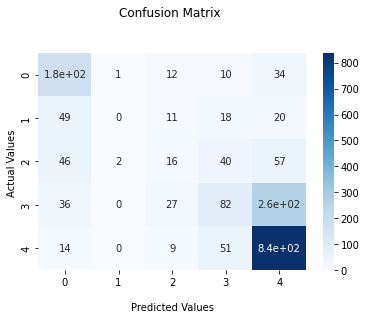

In [ ]:
ax = sns.heatmap(metrics.confusion_matrix(test_labels, SVM_predicts), annot=True, cmap='Blues')

ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

In [ ]:
linear_SVM = SVC(C=10.0, kernel='linear', tol=0.01)
linear_SVM.fit(train_data, train_labels_group)
SVM_predicts = linear_SVM.predict(test_data)

In [ ]:
SVM_accuracy = metrics.accuracy_score(test_labels_group, SVM_predicts)
SVM_precision_score_macro = metrics.precision_score(test_labels_group, SVM_predicts, average="macro")
SVM_precision_score_weighted = metrics.precision_score(test_labels_group, SVM_predicts, average="weighted")
SVM_recall_score_macro = metrics.recall_score(test_labels_group, SVM_predicts, average="macro")
SVM_recall_score_weighted = metrics.recall_score(test_labels_group, SVM_predicts, average="weighted")
SVM_f1_score_macro = metrics.f1_score(test_labels_group, SVM_predicts, average="macro")
SVM_f1_score_weighted = metrics.f1_score(test_labels_group, SVM_predicts, average="weighted")

print("Accuracy: ", SVM_accuracy)
print("Precision (macro): ", SVM_precision_score_macro)
print("Precision (weighted): ", SVM_precision_score_weighted)
print("Recall (macro): ", SVM_recall_score_macro)
print("Recall (weighted): ", SVM_recall_score_weighted)
print("F1 (macro): ", SVM_f1_score_macro)
print("F1 (weighted): ", SVM_f1_score_weighted)


Accuracy:  0.8197353914002206
Precision (macro):  0.572055063913471
Precision (weighted):  0.7673450026506393
Recall (macro):  0.5571195153173103
Recall (weighted):  0.8197353914002206
F1 (macro):  0.5473978011723801
F1 (weighted):  0.7875919883138496


In [ ]:
print(metrics.classification_report(test_labels_group, SVM_predicts))
print(metrics.confusion_matrix(test_labels_group, SVM_predicts))

              precision    recall  f1-score   support

           1       0.70      0.70      0.70       338
           2       0.16      0.02      0.04       161
           3       0.86      0.95      0.90      1315

    accuracy                           0.82      1814
   macro avg       0.57      0.56      0.55      1814
weighted avg       0.77      0.82      0.79      1814

[[ 236    9   93]
 [  47    4  110]
 [  56   12 1247]]


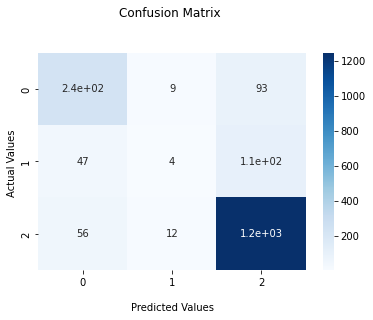

In [ ]:
ax = sns.heatmap(metrics.confusion_matrix(test_labels_group, SVM_predicts), annot=True, cmap='Blues')

ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()